In [ ]:
%pip install opencv-python numpy Pillow matplotlib

In [1]:
import matplotlib.pyplot as plt

def show_images(img_lst):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(img_lst)):
        fig.add_subplot(1, len(img_lst), i + 1)
        plt.imshow(img_lst[i])
        plt.axis("off")
    plt.show()

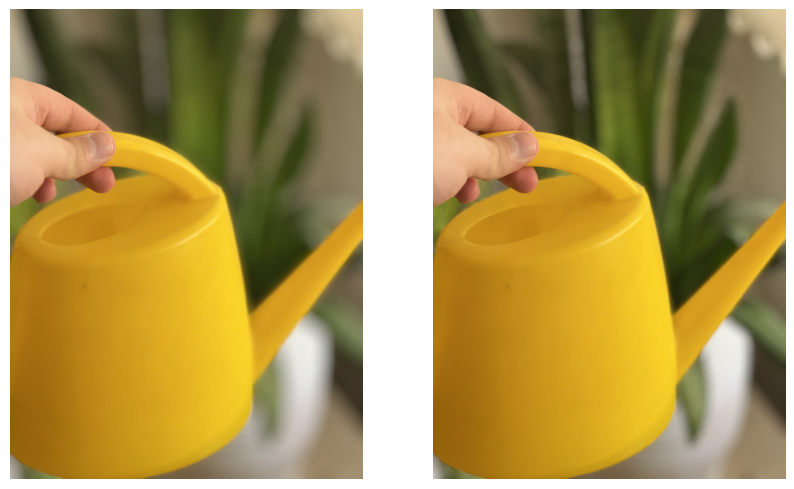

In [3]:
from PIL import  Image

blur_1 = Image.open('./1.jpg')
blur_2 = Image.open('./2.jpg')
show_images([blur_1, blur_2])

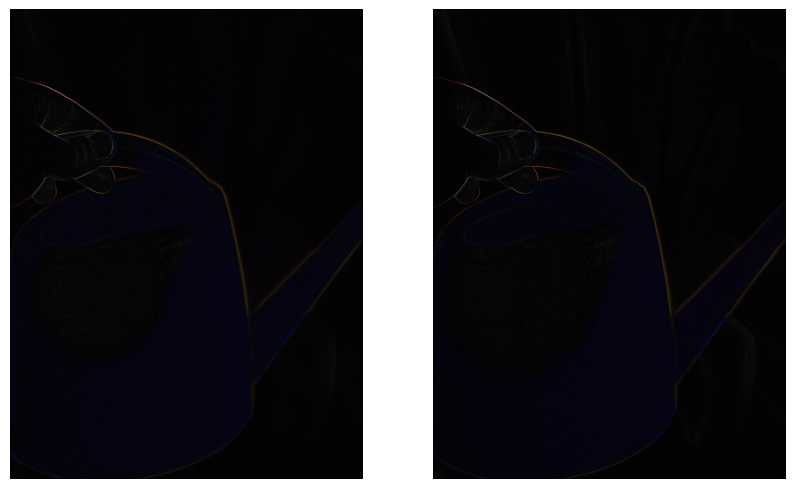

In [20]:
# Calculate Gradients of the image using Sobel Operator
import cv2
import numpy as np

def sobel(img):
    img = np.array(img, dtype=np.float32)
    # Sobel Operator
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    # Calculate the magnitude of the gradient
    sobel = np.sqrt(sobelx**2 + sobely**2)
    # Calculate the direction of the gradient
    theta = np.arctan2(sobely, sobelx)
    return sobel, theta

# Apply Sobel Operator to the image
sobel_1, theta_1 = sobel(blur_1)
sobel_2, theta_2 = sobel(blur_2)

# Change the range to 0 - 255
sobel_1 = np.uint8(sobel_1 / np.max(sobel_1) * 255)
sobel_2 = np.uint8(sobel_2 / np.max(sobel_2) * 255)

show_images([sobel_1, sobel_2])

In [63]:
sobel_1

array([[  0.        , 320.        , 424.        , ...,  10.        ,
         46.        ,   0.        ],
       [ 58.        , 314.35648554, 425.73465915, ...,  55.73149917,
         61.07372594,  40.        ],
       [ 84.        , 294.76770515, 416.36762602, ...,  56.        ,
         38.47076812,  20.        ],
       ...,
       [112.        , 274.16783181, 358.23176855, ...,  31.40063694,
         34.05877273,  26.        ],
       [ 80.        , 270.20362692, 380.75714045, ...,  29.69848481,
         22.84731932,   0.        ],
       [  0.        , 262.        , 390.        , ...,  18.        ,
         12.        ,   0.        ]])

In [64]:
sobel_2

array([[  0.        , 318.        , 476.        , ...,   2.        ,
         16.        ,   0.        ],
       [ 92.        , 326.37708253, 481.68454407, ...,  85.0529247 ,
         85.15867542,  82.        ],
       [116.        , 317.30427038, 474.43650787, ...,  77.0584194 ,
         72.44308111,  68.        ],
       ...,
       [148.        , 401.6590594 , 536.41215497, ...,  75.16648189,
         69.42621983,  46.        ],
       [ 96.        , 377.88093363, 533.97565488, ...,  60.95900262,
         48.76474136,  14.        ],
       [  0.        , 354.        , 518.        , ...,  38.        ,
         34.        ,   0.        ]])

In [65]:
sobel_3

array([[   0.        ,  150.        , 1172.        , ...,  388.        ,
         218.        ,    0.        ],
       [ 684.        ,  606.11880024, 1204.20596245, ...,  997.18102669,
         940.51581592,  908.        ],
       [ 646.        ,  833.76375551, 1445.02249117, ...,  643.47338717,
         540.01481461,  504.        ],
       ...,
       [ 700.        ,  737.63134424,  598.11035771, ...,  108.04628638,
         761.18985805,  642.        ],
       [ 506.        ,  524.81806371,  486.62100242, ...,  163.24827717,
         355.37585737,  598.        ],
       [   0.        ,  216.        ,  300.        , ...,  204.        ,
         128.        ,    0.        ]])

In [ ]:
# Calculate DFT of the image
def dft2D(img):
    img = np.array(img)
    # Get the image size
    M, N = img.shape
    # Create a matrix to store the result
    dft = np.zeros((M, N), dtype=np.complex64)
    # Calculate the DFT
    for u in range(M):
        for v in range(N):
            for x in range(M):
                for y in range(N):
                    dft[u, v] += img[x, y] * np.exp(
                        -1j * 2 * np.pi * (float(u * x) / M + float(v * y) / N)
                    )
    # Return the result
    return dft

dft_1 = dft2D(blur_1.convert('L'))
dft_2 = dft2D(blur_2.convert('L'))

magnitude_spectrum_1 = 20 * np.log(np.abs(dft_1))
magnitude_spectrum_2 = 20 * np.log(np.abs(dft_2))

show_images([magnitude_spectrum_1, magnitude_spectrum_2])

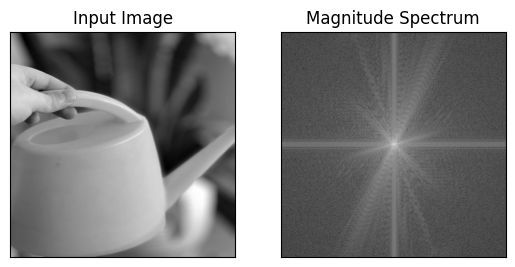

In [49]:
simple = np.array(blur_1.resize((512, 512)).convert('L'))
rows, cols = simple.shape
m = cv2.getOptimalDFTSize(rows)
n = cv2.getOptimalDFTSize(cols)
padded = cv2.copyMakeBorder(simple, 0, m - rows, 0, n - cols, cv2.BORDER_CONSTANT, value=0)
padded = np.float32(padded)

dft = cv2.dft(padded, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum_1 = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(simple, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_1, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

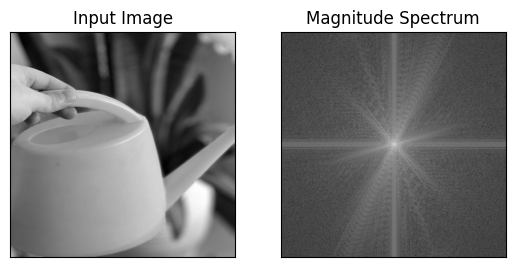

In [50]:
simple = np.array(blur_2.resize((512, 512)).convert('L'))
rows, cols = simple.shape
m = cv2.getOptimalDFTSize(rows)
n = cv2.getOptimalDFTSize(cols)
padded = cv2.copyMakeBorder(simple, 0, m - rows, 0, n - cols, cv2.BORDER_CONSTANT, value=0)
padded = np.float32(padded)

dft = cv2.dft(padded, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum_2 = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(simple, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_2, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
clipped_1 = magnitude_spectrum_1 / magnitude_spectrum_1.max()

In [52]:
clipped_2 = magnitude_spectrum_2 / magnitude_spectrum_2.max()

In [53]:
np.linalg.norm(clipped_1 - clipped_2)

19.739664

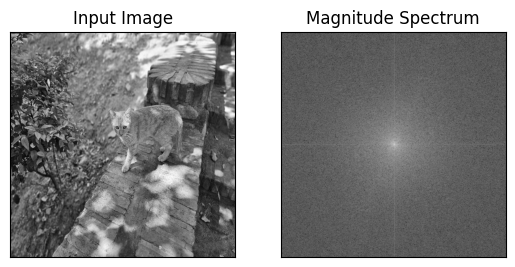

In [54]:
blur_3 = Image.open('./Dataset/RealWorld/GT_Images/25.jpg')

simple = np.array(blur_3.convert('L'))
rows, cols = simple.shape
m = cv2.getOptimalDFTSize(rows)
n = cv2.getOptimalDFTSize(cols)
padded = cv2.copyMakeBorder(simple, 0, m - rows, 0, n - cols, cv2.BORDER_CONSTANT, value=0)
padded = np.float32(padded)

dft = cv2.dft(padded, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum_3 = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(simple, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_3, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [55]:
clipped_3 = magnitude_spectrum_3 / magnitude_spectrum_3.max()

In [56]:
np.linalg.norm(clipped_2 - clipped_3)

76.41127

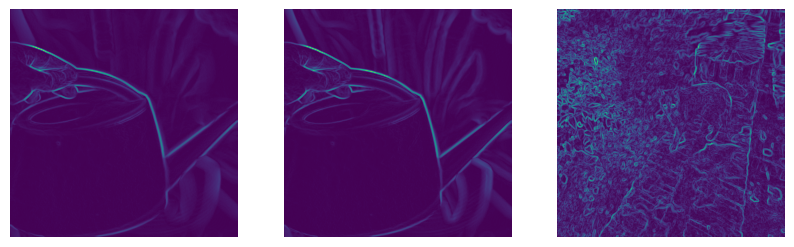

In [57]:
sobel_1, theta_1 = sobel(blur_1.resize((512, 512)).convert('L'))
sobel_2, theta_2 = sobel(blur_2.resize((512, 512)).convert('L'))
sobel_3, theta_3 = sobel(blur_3.resize((512, 512)).convert('L'))

show_images([sobel_1, sobel_2, sobel_3])

In [58]:
sobel1_norm = sobel_1 / sobel_1.max()
sobel2_norm = sobel_2 / sobel_2.max()
sobel3_norm = sobel_3 / sobel_3.max()

In [61]:
np.linalg.norm(sobel1_norm - sobel2_norm)

10.756883826996189

In [60]:
np.linalg.norm(sobel1_norm - sobel3_norm)

71.54982815573754

In [62]:
np.linalg.norm(sobel2_norm - sobel3_norm)

71.78615198272007

$$ loss = ((1 - \lambda) * DFT) + \lambda * Sobel $$

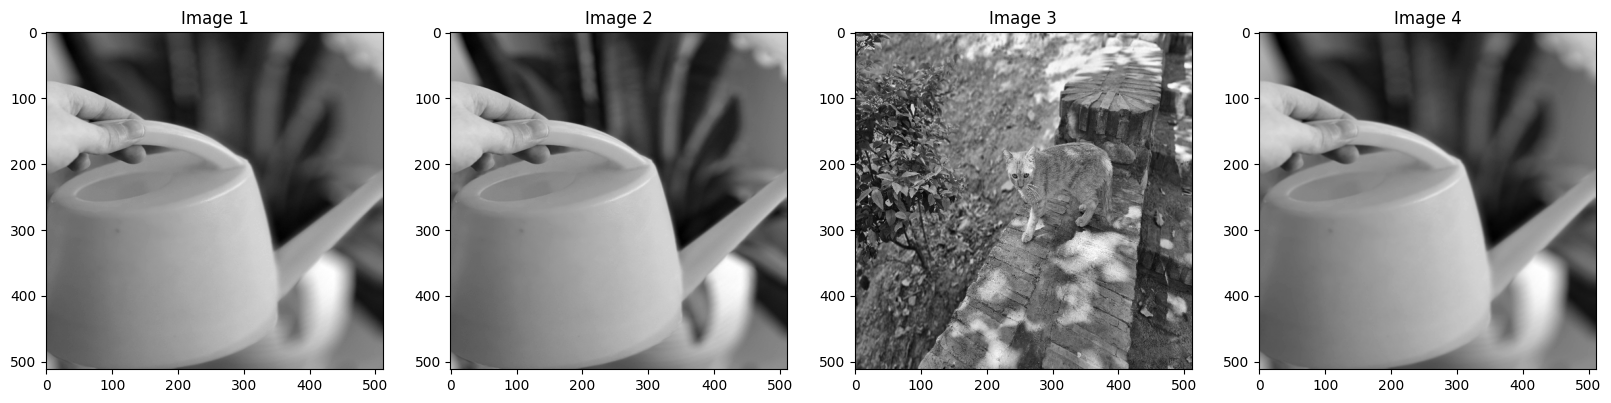

In [6]:
from torch_blursim.blur_sim import BlurSim
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_1 = Image.open("./1.jpg").resize((512, 512)).convert("L")
img_2 = Image.open("./2.jpg").resize((512, 512)).convert("L")
img_3 = Image.open("./Dataset/RealWorld/GT_Images/25.jpg").convert("L")
img_4 = cv2.GaussianBlur(np.array(img_1), (3, 3), 0, 0)

# Show the 4 images in a row
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(img_1, cmap="gray")
ax1.set_title("Image 1")
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(img_2, cmap="gray")
ax2.set_title("Image 2")
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(img_3, cmap="gray")
ax3.set_title("Image 3")
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(img_4, cmap="gray")
ax4.set_title("Image 4")
plt.show()

In [7]:
blur_sim = BlurSim(alpha=0.8)
print("Loss Between img_1 and img_4:")
print(blur_sim(img_1, img_4))
print()
print("Loss Between img_1 and img_3:")
print(blur_sim(img_1, img_3))
print()
print("Loss Between img_2 and img_3:")
print(blur_sim(img_2, img_3))
print()
print("Loss Between img_1 and img_2:")
print(blur_sim(img_1, img_2))

Loss Between img_1 and img_4:
tensor(0.2681, dtype=torch.float64)

Loss Between img_1 and img_3:
tensor(16.6952, dtype=torch.float64)

Loss Between img_2 and img_3:
tensor(16.8820, dtype=torch.float64)

Loss Between img_1 and img_2:
tensor(1.5494, dtype=torch.float64)
